# CRM Market Analysis: USING CRM DATASET FROM KAGGLE.COM 
   - CUSTOMER SEGMENTATON MODEL ANALYSIS
   - MARKET PENETRATION ANALYSIS

In [1]:
# Import needed library  for the  analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
# Read csv files for the analysis
df=pd.read_csv('Customer Segmentation Analysis - RFM Model Analysis.csv')

In [3]:
# Summary datatype, counts and ccolumn names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  int64  
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  int64  
 7   Country      397924 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 24.3+ MB


In [4]:
# Detailed data in the dataframe
df.size

3183392

In [5]:
# Detailed data by rolls and columns
df.shape

(397924, 8)

In [6]:
# State out the column names
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
#Request for missig data in the dataframe
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
# Request for dupicate data in the datframe.
df.duplicated().sum()

5192

In [9]:
# Based on the subjects analysis, the duplicated data will be removed and cleaned from the dataframe. It is renamed as "df1"
df1=df.drop_duplicates()

# Confirm the removal of duplcated data have been removed
print(f"Number of remaining duplicates: {df1.duplicated().sum()}")


Number of remaining duplicates: 0


In [10]:
# Default cleaned dataframe 
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850,United Kingdom


In [11]:
 #Requesting python to generate colour from the python terminal and also asking python to igorne warning display output 
from IPython.display import display
from colorama import Fore
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Conversion of Invoice date to datetime from the cleaned dataframe
df1['InvoiceDate']=pd.to_datetime(df1['InvoiceDate'])

In [13]:
# Print out the lastest invoice date
print(df1['InvoiceDate'].max())

2011-12-09 12:50:00


In [14]:
#The last sales day was 2011/12/09, therefore the new date "today_date was 2011/12/10".
import datetime as dt
today_date = dt.datetime(2011,12,10)

In [15]:
#Calculate the total sales by multiplying unit price by quantity sold
df1['Sales']= ((df1['UnitPrice'])*(df1['Quantity']))

In [16]:
# Summary descriptive table for numerical datatype
df1.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Sales
count,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000
mean,560591.072436,13.153718,3.125596,15287.734822,22.629195
std,13087.116747,181.588420,22.240725,1713.567773,311.083465
min,536365.000000,1.000000,0.000000,12346.000000,0.000000
25%,549234.000000,2.000000,1.250000,13955.000000,4.950000
50%,561874.000000,6.000000,1.950000,15150.000000,12.390000
75%,572061.000000,12.000000,3.750000,16791.000000,19.800000
max,581587.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [17]:
# Summary descriptive table for non-numerical(categorical) datatype
df1.describe(include='O')

,StockCode,Description,Country
count,392732,392732,392732
unique,3665,3876,37
top,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,2023,2016,349227


In [18]:
#Customer purchases by geographical locations - Country
pd.crosstab(index=df1["Country"],columns=['CustomerID'])

col_0,CustomerID
Country,
Australia,1184
Austria,398
Bahrain,17
Belgium,2031
Brazil,32
Canada,151
Channel Islands,747
Cyprus,603
Czech Republic,25


Interpretation: The Country with the highest number of dataset is "United Kingdom", whereas the country with the lowest is Saudi Arabia

# CUSTOMER SEGMENTATON ANALYSIS

***Customer Segmentation by RFM Analysis (Recency Frequency and Monetary Value).
*This is describe the customer as per their loyalty within the period of sales.

In [19]:
rfmTable=(df1.groupby('CustomerID').agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                       'InvoiceNo': lambda x:x.count(),
                                        'Sales': lambda x:x.sum()}))

In [20]:
# Convert Invoice Date datatype  to integer datatype
rfmTable['InvoiceDate']=rfmTable['InvoiceDate'].astype(int)

In [21]:
# In a tabular form, display the rfm frequency table with respect to CustomerID
rfmTable.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Sales':'Monetary_Value'}, inplace=True)
rfmTable.head(10)

,Recency,Frequency,Monetary_Value
CustomerID,,,
12346,325,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,18,73,1757.55
12350,310,17,334.40
12352,36,85,2506.04
12353,204,4,89.00
12354,232,58,1079.40
12355,214,13,459.40


In [22]:
# Create a new name for the above rfm table
rfmSegmentation = rfmTable

In [23]:
def RClass(x,p,d):     
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [24]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary_Value
0.25,17.0,17.0,306.455
0.50,50.0,41.0,668.560
0.75,141.5,98.0,1660.315


In [25]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['Monetary_Value'].apply(FMClass, args=('Monetary_Value',quantiles,))

In [26]:
# Assign each customerID to RFM class
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

rfmSegmentation.head()

,Recency,Frequency,Monetary_Value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12346,325,1,77183.60,4,4,1,441
12347,2,182,4310.00,1,1,1,111
12348,75,31,1797.24,3,3,1,331
12349,18,73,1757.55,2,2,1,221
12350,310,17,334.40,4,4,3,443


In [27]:
rfmSegmentation['RFMScores'] = rfmSegmentation['R_Quartile'] + rfmSegmentation['F_Quartile'] + rfmSegmentation['M_Quartile']
rfmSegmentation['RFMScores']

CustomerID
12346     9
12347     3
12348     7
12349     5
12350    11
         ..
18280    12
18281    12
18282     9
18283     3
18287     5
Name: RFMScores, Length: 4339, dtype: int64

In [28]:
# Segment each customers to their loyalty level using the RFM scores
Loyalty_level = ['Top-Customer','High-Value-Customer','Medium-Value-Customer','Low-Value-Customer','Lost Customer']
Score_cuts = pd.qcut(rfmSegmentation.RFMScores, q = 5, labels = Loyalty_level)
rfmSegmentation['Customer_Loyalty_Level'] = Score_cuts.values
rfmSegmentation.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary_Value,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScores,Customer_Loyalty_Level
0,12346,325,1,77183.60,4,4,1,441,9,Medium-Value-Customer
1,12347,2,182,4310.00,1,1,1,111,3,Top-Customer
2,12348,75,31,1797.24,3,3,1,331,7,High-Value-Customer
3,12349,18,73,1757.55,2,2,1,221,5,Top-Customer
4,12350,310,17,334.40,4,4,3,443,11,Lost Customer
5,12352,36,85,2506.04,2,2,1,221,5,Top-Customer
6,12353,204,4,89.00,4,4,4,444,12,Lost Customer
7,12354,232,58,1079.40,4,2,2,422,8,Medium-Value-Customer
8,12355,214,13,459.40,4,4,3,443,11,Lost Customer
9,12356,22,59,2811.43,2,2,1,221,5,Top-Customer


In [29]:
# Display the top 5 'Top customers' within th sales period
rfmSegmentation[rfmSegmentation['RFMClass']=='111'].sort_values('Monetary_Value',ascending=False).reset_index().head(5)

,CustomerID,Recency,Frequency,Monetary_Value,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScores,Customer_Loyalty_Level
0,14646,1,2080,280206.02,1,1,1,111,3,Top-Customer
1,18102,0,431,259657.30,1,1,1,111,3,Top-Customer
2,17450,8,336,194390.79,1,1,1,111,3,Top-Customer
3,14911,1,5672,143711.17,1,1,1,111,3,Top-Customer
4,14156,9,1395,117210.08,1,1,1,111,3,Top-Customer


In [30]:
# Display the buttom 5 'Lost customers' within th sales period
rfmSegmentation[rfmSegmentation['RFMClass']=='444'].sort_values('Monetary_Value',ascending=False).reset_index().head(5)

,CustomerID,Recency,Frequency,Monetary_Value,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFMScores,Customer_Loyalty_Level
0,17176,201,15,306.13,4,4,4,444,12,Lost Customer
1,15219,176,9,305.75,4,4,4,444,12,Lost Customer
2,18220,226,2,305.28,4,4,4,444,12,Lost Customer
3,16217,235,15,304.25,4,4,4,444,12,Lost Customer
4,18185,249,17,304.25,4,4,4,444,12,Lost Customer


**From the above Customer Segmentation analysis is displayed using bar chart the percentage of loyalty level of customers

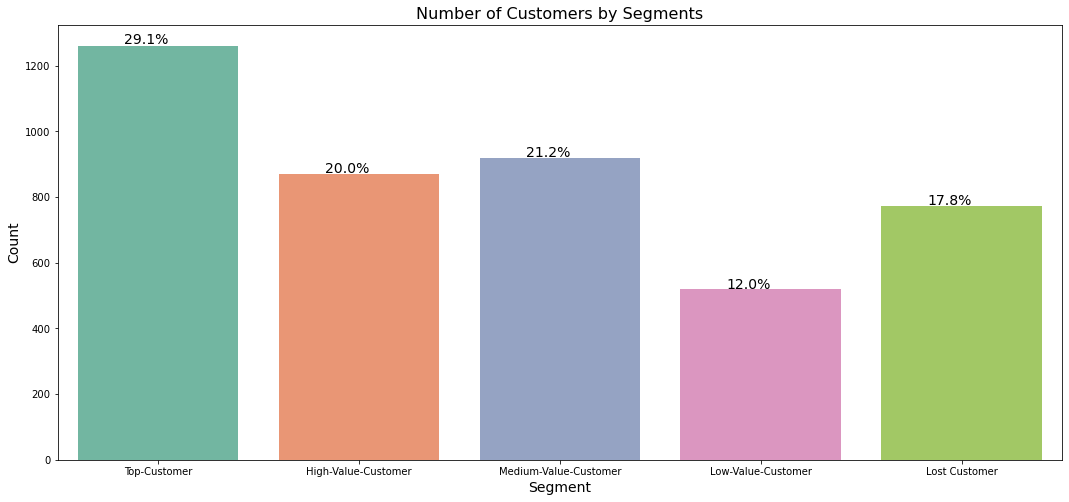

In [31]:
# Import library matplotlib.color to display customer segmentations into bar chart
import matplotlib.colors as mcolors
palette = 'Set2'

#
plt.figure(figsize = (18, 8))
ax = sns.countplot(data = rfmSegmentation,
                   x = 'Customer_Loyalty_Level',
                   palette = palette)
total = len(rfmSegmentation.Customer_Loyalty_Level)
for patch in ax.patches:
    percentage = '{:.1f}%'.format(100 * patch.get_height()/total)
    x = patch.get_x() + patch.get_width() / 2 - 0.17
    y = patch.get_y() + patch.get_height() * 1.005
    ax.annotate(percentage, (x, y), size = 14)
plt.title('Number of Customers by Segments', size = 16)
plt.xlabel('Segment', size = 14)
plt.ylabel('Count', size = 14)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.show()

***Interpretation from the chart above: Top customer had the highest frequency, whereas Lost customer had the lowest frequency.

***Conclusion: The RFM segmentation analysis shows that the company customer base is divivded ito distinct value tiers. The most valuable customers (Top and High-Value Customers) make upa significant portion of the company's revenue (49.1%). It's important to focus on retaining and nurturing these customers while identifying opportunties to improve engagement with Medium and Low-Value Customers.


***KEY STRATEGIES
Rentention: Top and high-value customers
Upselling and cross-selling: Create more selling opportunities for medium and low-value customers
Re-engagement: Plan and execute strategies that will can be used to re-engage the lost customers such as win-back campaign, special offers.
Cost-Effectiveness:Implementation of sales promotion to derive more purchase or upselling. But also evalute he cost-effectives of the sales promotion.

***

# From the above analysis, it was decided to run some futher analysis to determine how well the company have been able to penetrate the market using (purchasing frequency and the Market geographical penetration analysis).

# Market Penetration Analysis - Marketing Analysis
 - Purchasing Frequency
 - Geographical Penetration

# Purchasing Frequency

In [32]:
# Calculate number of unique customers
num_customerID=df1['CustomerID'].nunique()
num_customerID

4339

In [33]:
# Calculate total number of purchases made within the period
Total_Purchase=df1['Sales'].sum()
Total_Purchase

8887208.894000003

In [34]:
# To calculate purchasing frequency, divide the Total purchase by the number of customer ID
Purchasing_Frequency=Total_Purchase/num_customerID

# Display the purchasing frequency using the above
print(f"Purchasing Frequency:{Purchasing_Frequency}")

Purchasing Frequency:2048.2159239456105


***Interpretation: On an average each customer made over 2,000 purchases within the year 2010 and 2011. Meaning a very large number of purchases were made within the sales period.It also indicate high volume buyers(That is., serving a few high volume customers who make multiple purchases in a short period).

**From the top 5 customers, customers ID (14646, 14911 and 14156) are high-volume customers, with high-value purchases (2080, 5672 and 1395 respectively) in bulk within the period.

***KEY STRATEGIES: Tailors marketing efforts, offer loyalty rewards to those customers. Also they ensure that those customers are nurtured to drive continuity and more revenue.


In [35]:
# Using the parameters above and assumpton of the target market size is 10000. We can derive the market penetration rate.

target_market_size= 10000

Market_Penetration=(num_customerID/target_market_size)*100
print(f"Market Penetration:{Market_Penetration}")

Market Penetration:43.39


***Interpretation: The maret penetration rate of 43.39%, means that approximately 43.39% of the total potential customers in the target market have already purchased or engaged with the company's products.

***Suggestion: The company has captured a relatively large portion of the market, but still has significant room for growth. It shows that nearly half of the potential market has been reached, but there is still a 56.61% of untapped market share.


***Key strategies: 
 - Growth Strategy
 - Customer retention and
 - Market research

#  Customer Acquistion (UP NEXT)